- 新算法：

$$
\begin{align*}
v_{i, k + 1} &= \sum b_{ij}v_{j, k} \\
x_{i, k + 1} &= x_{i, k} - \alpha\left[ \nabla_1f_i(x_{i, k}, z_{i, k}) + \nabla\phi_i(x_{i, k})p_{i, k} \right] \\
\sigma_{i, k + 1} &= \sum b_{ij}\sigma_{j, k} + \phi_i(x_{i, k + 1}) - \phi_i(x_{i, k}) \\
y_{i, k + 1} &= \sum b_{ij}y_{j, k} + \nabla_2f(x_{i, k + 1}, \sigma_{i, k + 1}) - \nabla_2f(x_{i, k}, \sigma_{i, k}) \\
w_{i, k + 1} &= \sum b_{ij}\sigma_{j, k} \\
u_{i, k + 1} &= \sum b_{ij}y_{j, k} \\
z_{i, k + 1} &= \frac{w_{i, k + 1}}{v_{i, k + 1}} \\
p_{i, k + 1} &= \frac{u_{i, k + 1}}{v_{i, k + 1}} \\
\end{align*}
$$

- 初始化：$x_{i, 0}$ is arbitrary, $\sigma_{i, 0} = \phi_{i, 0}$, $v_{i, 0} = 1$, $y_{i, 0} = \nabla_2 f(x_{i, 0}, \sigma_{i, 0})$, The graph is strongly connected.

- 题目中：$\sigma(x) = \frac{1}{N}\sum\phi_i(x_i)$

- 注意这里题目中的$\sigma(x)$的定义是平均值，但是在上述公式中的$\sigma$与题目中的定义无关，只是一个符号

N = 5

5个敌人的坐标(1, 6), (4, 8), (9, 8), (4, 2), (8, 3)

仿真代价函数：$f_i(x_i,\sigma(x))=\frac{1}{2}\|x_i - p_i\|^2 + \frac{1}{2}\|x_i - b\|^2 + \frac{5}{N}\|\sigma(x) - b\|^2$

聚合函数：$\sigma(x) = \frac{1}{N}\sum\phi_i(x_i)$

花费函数：$\phi_i(x_i) = x_i$

$\nabla_1 f = (x - p) + (x - b)$

$\nabla_2 f = 2(\sigma(x) - b)$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 1000
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 1/2, 1/2],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 0],
    [0, 0, 1/3, 0, 1/2]
]
b = np.array(b)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = 2 * (s - 5)

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)]
s_y = [[] for i in range(n)]
r1 = np.array([1.0, 4.0, 9.0, 4.0, 8.0]) # x坐标
r2 = np.array([6.0, 8.0, 8.0, 2.0, 3.0]) # y坐标
xx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ss[i] = sum + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    yy[i] = sum + (2 * (ss[i] - 5)) - (2 * (s[i] - 5))

def upd_x(i):
    xx[i] = x[i] - alpha * ((x[i] - r[i]) + (x[i] - 5) + p[i])

def backup():
    global x, v, s, y, u, p, w, z
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, r1, r2, v, s, y, u, p, w, z
    global xx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    # x = np.random.randint(1, 5, n)
    # x = np.float64(x)
    x[0] = 1.0
    x[1] = 2.0
    x[2] = 3.0
    x[3] = 4.0
    x[4] = 5.0
    if op == 1: r = r1
    else: r = r2
    v = np.ones(n)
    s = x.copy()
    y = 2 * (s - 5)
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num):
    global r, ans_x, ans_y
    init(1)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_x[i].append(xx[i])
            s_x[i].append(ss[i])
        backup()
    init(2)
    for T in range(iter_num):
        for i in range(n):
            upd_v(i)
            upd_x(i)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_y[i].append(xx[i])
            s_y[i].append(ss[i])
        backup()

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x, sum_y = 0, 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
        sum_y += ans_y[i][iter_num-1]
    sum_x /= n
    sum_y /= n
    for i in range(n):
        sum += 0.5 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               0.5 * ((ans_x[i][iter_num-1] - 5) ** 2 + (ans_y[i][iter_num-1] - 5) ** 2) + \
               ((sum_x - 5) ** 2 + (sum_y - 5) ** 2)
    return sum

tmp = 1000
solve(tmp)
print('经过%d轮迭代, 最终F(x)收敛到: ' % tmp, cal(tmp))
for i in range(n):
    print(ans_x[i][tmp-1], ans_y[i][tmp-1])

# 检验z的收敛性
# sum = 0
# for i in range(n):
#     sum += (ans_y[i][tmp-1])
# print(sum / n)
# for i in range(n):
#     print(z[i])

# 检验p的收敛性
# sum = 0
# for i in range(n):
#     sum += ans_y[i][tmp-1]
# sum /= n
# print(2 * (sum - 5))
# for i in range(n):
#     print(p[i])

经过1000轮迭代, 最终F(x)收敛到:  18.875
2.9500000001992603 5.399999996115055
4.449999999294366 6.3999999960843
6.949999996751828 6.399999997798429
4.4500000026935425 3.4000000045878194
6.450000001062169 3.9000000054169224


下面是更换一个代价函数的例子

$f_i(x_i,\sigma(x))=\frac{1}{2}\|x_i - p_i\|^2 + \frac{1}{2}\|x_i - b\|^2 + \|\sigma(x) - b\|^2 + \| x_i - \sigma(x) \|^2$

$\nabla_1 f = x - p + x - b + 2(x - \sigma)$

$\nabla_2 f = 2(\sigma - b) - 2(x - \sigma)$

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 常数
Iter_Num = 1000
n = 5
alpha = 0.01
b = [
    [1/2, 0, 0, 1/2, 1/2],
    [1/2, 1/2, 0, 0, 0],
    [0, 1/2, 1/3, 0, 0],
    [0, 0, 1/3, 1/2, 0],
    [0, 0, 1/3, 0, 1/2]
]
b1 = [
    [1., 0., 0., 0., 1/3],
    [0., 1., 0., 1/2, 1/3],
    [0., 0., 1/2, 0., 0.],
    [0., 0., 0., 1/2, 0.],
    [0., 0., 1/2, 0., 1/3]
]
b2 = [
    [1/2, 0., 0., 1/2, 0.],
    [0., 1/3, 0., 0., 0.],
    [0., 1/3, 1/2, 0., 1/2],
    [0., 1/3, 0., 1/2, 0.],
    [1/2, 0., 1/2, 0., 1/2]
]
b = np.array(b)
b1 = np.array(b1)
b2 = np.array(b2)
x_best1 = np.array([4.0, 4.75, 6.0, 4.75, 5.75])
x_best2 = np.array([5.25, 5.75, 5.75, 4.25, 4.5])
x_best = np.zeros(n)

# 初始化
x = np.random.randint(1, 5, n) # x是(1, 5)的随机数
x = np.float64(x)
r = np.zeros(n)
v = np.ones(n)
s = x.copy()
y = 2 * (s - 5)

# push-sum变量
u = np.zeros(n)
p = np.zeros(n)
w = np.zeros(n)
z = np.zeros(n)

# 辅助量
ans_x = [[] for i in range(n)] # 存每个点迭代过程中的x坐标  ans_x[i][tim]
ans_y = [[] for i in range(n)] # 存每个点迭代过程中的y坐标  ans_y[i][tim]
s_x = [[] for i in range(n)]
s_y = [[] for i in range(n)]
r1 = np.array([1.0, 4.0, 9.0, 4.0, 8.0]) # x坐标
r2 = np.array([6.0, 8.0, 8.0, 2.0, 3.0]) # y坐标
xx = x.copy()
xxx = x.copy()
vv = v.copy()
ss = s.copy()
yy = y.copy()
uu = u.copy()
pp = p.copy()
ww = w.copy()
zz = z.copy()

#------------------------------------------------------------------
def upd_v(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * v[j]
    vv[i] = sum

def upd_w(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ww[i] = sum

def upd_z(i):
    zz[i] = ww[i] / vv[i]

def upd_s(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * s[j]
    ss[i] = sum + xx[i] - x[i]

def upd_u(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    uu[i] = sum

def upd_p(i):
    pp[i] = uu[i] / vv[i]

def upd_y(i):
    sum = 0
    for j in range(n):
        sum += b[i, j] * y[j]
    yy[i] = sum + (2 * (ss[i] - 5) - 2 * (xx[i] - ss[i])) - (2 * (s[i] - 5) - 2 * (x[i] - s[i]))

def upd_x(i, op, vec):
    if op == 0:
        xx[i] = x[i] - alpha * 1 * ((x[i] - r[i]) + (x[i] - 5) + 2 * (x[i] - z[i]) + p[i]) + vec * (x[i] - xxx[i])
    else:
        xx[i] = x[i] - alpha * v[i] * ((x[i] - r[i]) + (x[i] - 5) + 2 * (x[i] - z[i]) + p[i]) + vec * (x[i] - xxx[i])

def backup():
    global x, v, s, y, u, p, w, z, xxx
    xxx = x.copy()
    x = xx.copy()
    v = vv.copy()
    s = ss.copy()
    y = yy.copy()
    u = uu.copy()
    p = pp.copy()
    w = ww.copy()
    z = zz.copy()

def init(op):
    global x, r, r1, r2, v, s, y, u, p, w, z, x_best, x_best1, x_best2
    global xx, xxx, vv, ss, yy, uu, pp, ww, zz
    # fixme: 可以把这里打开
    # x = np.random.randint(1, 5, n)
    # x = np.float64(x)
    x[0] = 1.0
    x[1] = 2.0
    x[2] = 3.0
    x[3] = 4.0
    x[4] = 5.0
    x = np.ones(n)
    if op == 1:
        r = r1
        x_best = x_best1
    else:
        x_best = x_best2
        r = r2
    v = np.ones(n)
    s = x.copy()
    y = 2 * (s - 5) - 2 * (x - s)
    u = np.zeros(n)
    p = np.zeros(n)
    w = np.zeros(n)
    z = np.zeros(n)
    xx = x.copy()
    xxx = x.copy()
    vv = v.copy()
    ss = s.copy()
    yy = s.copy()
    uu = u.copy()
    pp = p.copy()
    ww = w.copy()
    zz = z.copy()

# 算法迭代
def solve(iter_num, op, vec):
    global r, ans_x, ans_y, x_best, b, b1, b2
    res1 = []
    res2 = []
    init(1)
    for T in range(iter_num):
        # if T % 2: b = b1.copy()
        # else: b = b2.copy()
        sum = 0
        for i in range(n):
            sum += (x[i] - x_best[i]) ** 2
        res1.append(sum ** 0.5)
        for i in range(n):
            upd_v(i)
            upd_x(i, op, vec)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_x[i].append(xx[i])
            s_x[i].append(ss[i])
        backup()
    init(2)
    for T in range(iter_num):
        # if T % 2: b = b1.copy()
        # else: b = b2.copy()
        sum = 0
        for i in range(n):
            sum += (x[i] - x_best[i]) ** 2
        res2.append(sum ** 0.5)
        for i in range(n):
            upd_v(i)
            upd_x(i, op, vec)
            upd_s(i)
            upd_y(i)
            upd_w(i)
            upd_u(i)
            upd_z(i)
            upd_p(i)
            ans_y[i].append(xx[i])
            s_y[i].append(ss[i])
        backup()
    return [x + y for x, y in zip(res1, res2)]

# 计算仿真代价函数
def cal(iter_num):
    sum = 0
    sum_x, sum_y = 0, 0
    for i in range(n):
        sum_x += ans_x[i][iter_num-1]
        sum_y += ans_y[i][iter_num-1]
    sum_x /= n
    sum_y /= n
    for i in range(n):
        sum += 0.5 * ((ans_x[i][iter_num-1] - r1[i]) ** 2 + (ans_y[i][iter_num-1] - r2[i]) ** 2) + \
               0.5 * ((ans_x[i][iter_num-1] - 5) ** 2 + (ans_y[i][iter_num-1] - 5) ** 2) + \
               ((sum_x - 5) ** 2 + (sum_y - 5) ** 2) + \
               ((ans_x[i][iter_num-1] - sum_x) ** 2 + (ans_y[i][iter_num-1] - sum_y) ** 2)
    return sum

solve(1000, 0, 0)
print(cal(1000))

28.125


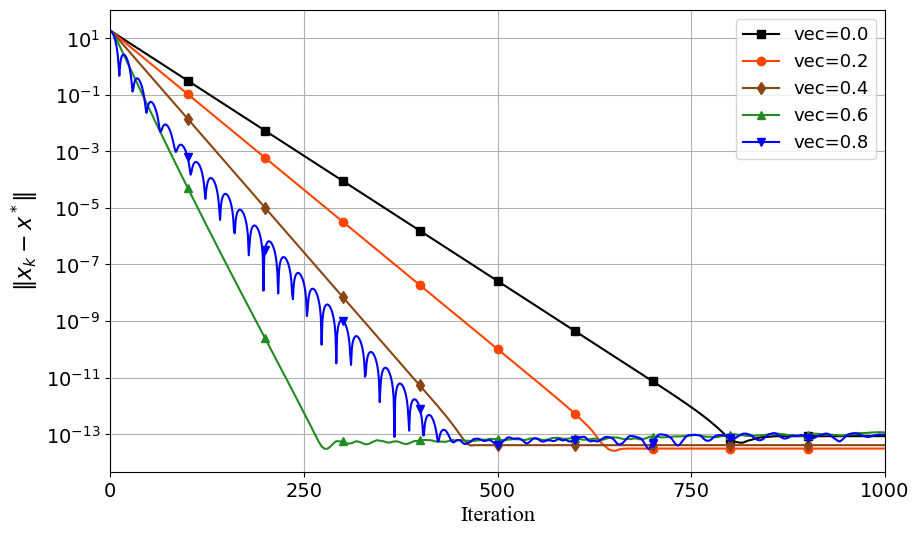

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(iter_num, op, vecs, vecs_name):
    # 设置画布尺寸
    plt.rcParams['figure.figsize'] = (10, 6)

    # 定义标记符号和颜色
    markers = ['s', 'o', 'd', '^', 'v', '<', '>']
    colors = ['black', 'orangered', 'saddlebrown', 'forestgreen', 'blue', 'brown', 'olive']

    x = list(range(iter_num))
    
    for T in range(len(vecs)):
        y = solve(iter_num, op, vecs[T])
        str = '(CS)' if op != 0 else ''
        
        # 生成标记点位置列表，跳过第一个位置
        interval = int(iter_num / 10)
        markevery = list(range(interval, iter_num, interval))

        # 绘制曲线
        plt.plot(x, y, linestyle='-', linewidth=1.5, markersize=6, 
                 markevery=markevery, marker=markers[T % len(markers)], 
                 color=colors[T % len(colors)], label=vecs_name[T] + str)

    # 设置x/y坐标标签及字体
    plt.xlabel('Iteration', fontsize=16, fontname='Times New Roman')
    plt.ylabel(r'$\|x_k - x^*\|$', fontsize=16, fontname='Times New Roman')

    # 将y轴刻度转换为10的负次方形式
    plt.yscale('log')
    plt.yticks(fontsize=14)
    
    # 设置x轴刻度范围和间隔，并确保从0开始
    plt.xlim(0, iter_num)
    x_ticks = np.linspace(0, iter_num, 5)
    plt.xticks(x_ticks, fontsize=14)

    # 启用网格
    plt.grid(True)

    # 添加图例并设置位置
    plt.legend(loc="upper right", fontsize=13)
    
    # 保存图像为PDF文件
    plt.savefig('fig9.pdf', bbox_inches='tight')

    # 显示绘制的图像
    plt.show()

vecs = [0.0, 0.2, 0.4, 0.6, 0.8]
vecs_name = ['vec=0.0', 'vec=0.2', 'vec=0.4', 'vec=0.6', 'vec=0.8']
plot_results(1000, 0, vecs, vecs_name)

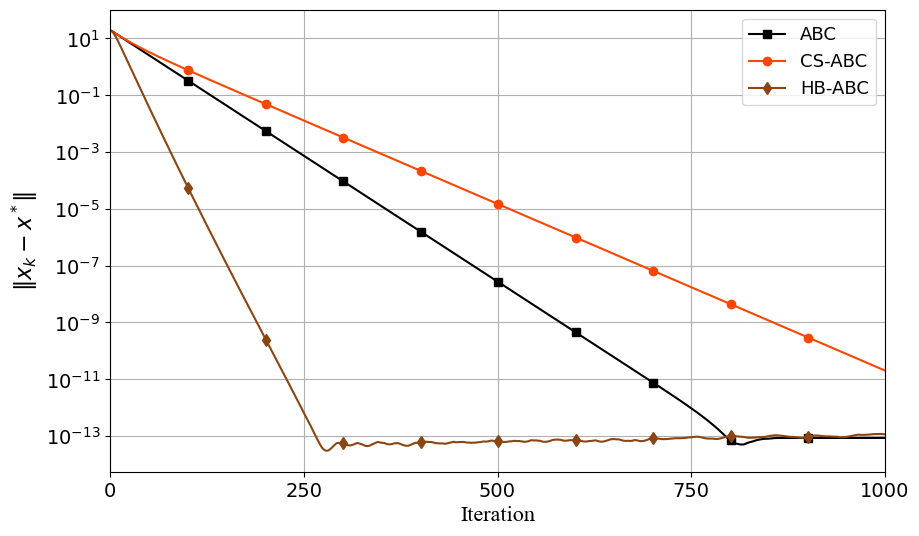

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 solve 是您的计算函数
# 如果 solve 函数未定义，请确保它正确实现
# 这里我假设 solve 函数已经在您的代码中定义

def plot_custom_results():
    # 设置画布尺寸
    plt.rcParams['figure.figsize'] = (10, 6)

    # 定义标记符号和颜色
    markers = ['s', 'o', 'd']
    colors = ['black', 'orangered', 'saddlebrown']

    # 迭代次数
    Iter_Num = 1000

    # 绘制ABC曲线
    plt.plot(range(1, Iter_Num + 1), solve(Iter_Num, 0, 0), 
             label='ABC', linestyle='-', linewidth=1.5, markersize=6, 
             markevery=range(Iter_Num // 10, Iter_Num, Iter_Num // 10), 
             marker=markers[0], color=colors[0])

    # 绘制CS-ABC曲线
    plt.plot(range(1, Iter_Num + 1), solve(Iter_Num, 1, 0), 
             label='CS-ABC', linestyle='-', linewidth=1.5, markersize=6, 
             markevery=range(Iter_Num // 10, Iter_Num, Iter_Num // 10), 
             marker=markers[1], color=colors[1])

    # 绘制HB-ABC曲线
    plt.plot(range(1, Iter_Num + 1), solve(Iter_Num, 0, 0.6), 
             label='HB-ABC', linestyle='-', linewidth=1.5, markersize=6, 
             markevery=range(Iter_Num // 10, Iter_Num, Iter_Num // 10), 
             marker=markers[2], color=colors[2])

    # 设置x/y坐标标签及字体
    plt.xlabel('Iteration', fontsize=16, fontname='Times New Roman')
    plt.ylabel(r'$\|x_k - x^*\|$', fontsize=16, fontname='Times New Roman')

    # 将y轴刻度转换为10的负次方形式
    plt.yscale('log')
    plt.yticks(fontsize=14)

    # 设置x轴刻度范围和间隔，并确保从0开始
    plt.xlim(0, Iter_Num)
    x_ticks = np.linspace(0, Iter_Num, 5)
    plt.xticks(x_ticks, fontsize=14)

    # 启用网格
    plt.grid(True)

    # 添加图例并设置位置
    plt.legend(loc="upper right", fontsize=13)

    # 保存图像为PDF文件
    plt.savefig('fig10.pdf', bbox_inches='tight')

    # 显示绘制的图像
    plt.show()

# 调用自定义结果绘图函数
plot_custom_results()